In [82]:
import numpy as np
import pandas as pd

In [83]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [84]:
#copy all the data from copy.csv to spam.csv
copy_df = pd.read_csv('copy.csv' ,  encoding='latin1')
copy_df.to_csv('spam.csv', index=False) 


In [85]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [86]:
df.shape

(5572, 5)

## 1. DATA CLEANING

In [87]:
##check wheather last 3 coloumns are of use or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
##what is the use of axis=1?
##axis=1 means drop the column, axis=0 means drop the row

In [89]:
#now change the v1 to target and v2 to text
df.rename(columns= {'v1':'target', 'v2':'text'},inplace = True)

In [90]:
df


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [91]:
##now we have to convert the target to 0 and 1 (encoding)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [92]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [93]:
#check for null valuess
df.isnull().sum()

target    0
text      0
dtype: int64

In [94]:
#remove all null values
df.dropna(inplace=True)

In [95]:
#check for duplicate values
df.duplicated().sum()

403

In [96]:
#remove duplicate values
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [97]:
df.shape
df
#see , the indexs are wrong(as they are old , and some rows have been removed becaue they are duplicates)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [98]:
#reasign the index
df.reset_index(drop=True, inplace=True)

In [99]:
df
#good to go

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will Ã_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


## 2. EDA
Exploratory Data Analysis
(checking data , satisfying our curiosity)

In [100]:
#check how much spam and ham are there
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

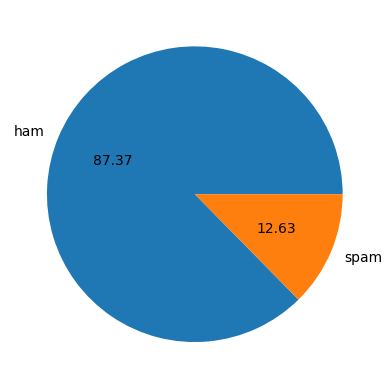

In [101]:
#visualise the data
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

##autopct is used to show the percentage in the pie chart
#what is the use of %0.2f?
##it is used to show the percentage upto 2 decimal places

In [102]:
import nltk

In [103]:
#use _tab to download the tokenizers , not the normal one
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\udayt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [104]:
#make a coloumn for number of characters in each text
df['num_characters'] = df['text'].apply(len)
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,163
5165,0,Will Ã_ b going to esplanade fr home?,38
5166,0,"Pity, * was in mood for that. So...any other s...",57
5167,0,The guy did some bitching but I acted like i'd...,125


In [105]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [106]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,163,35
5165,0,Will Ã_ b going to esplanade fr home?,38,9
5166,0,"Pity, * was in mood for that. So...any other s...",57,15
5167,0,The guy did some bitching but I acted like i'd...,125,27


In [107]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [108]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,163,35,4
5165,0,Will Ã_ b going to esplanade fr home?,38,9,1
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5167,0,The guy did some bitching but I acted like i'd...,125,27,1


In [109]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.186883,18.456761,1.966531
std,58.380576,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
#describe for ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.575952,17.123782,1.820195
std,56.396321,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
#describe for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.738132,27.675345,2.978560
std,30.418104,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


In [112]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

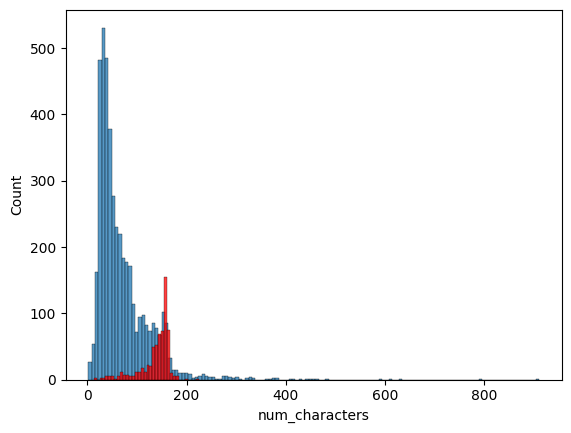

In [113]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color='red')

<Axes: xlabel='num_words', ylabel='Count'>

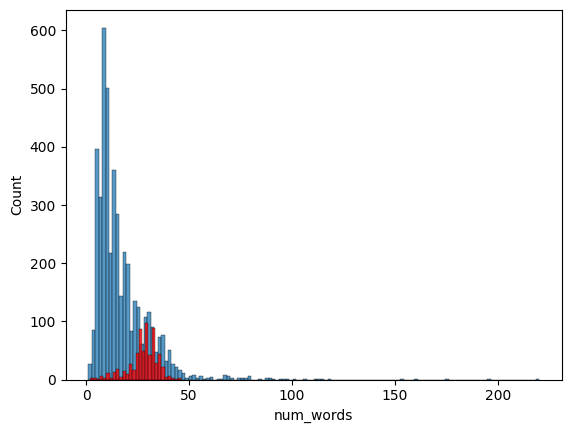

In [114]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'] , color='red')

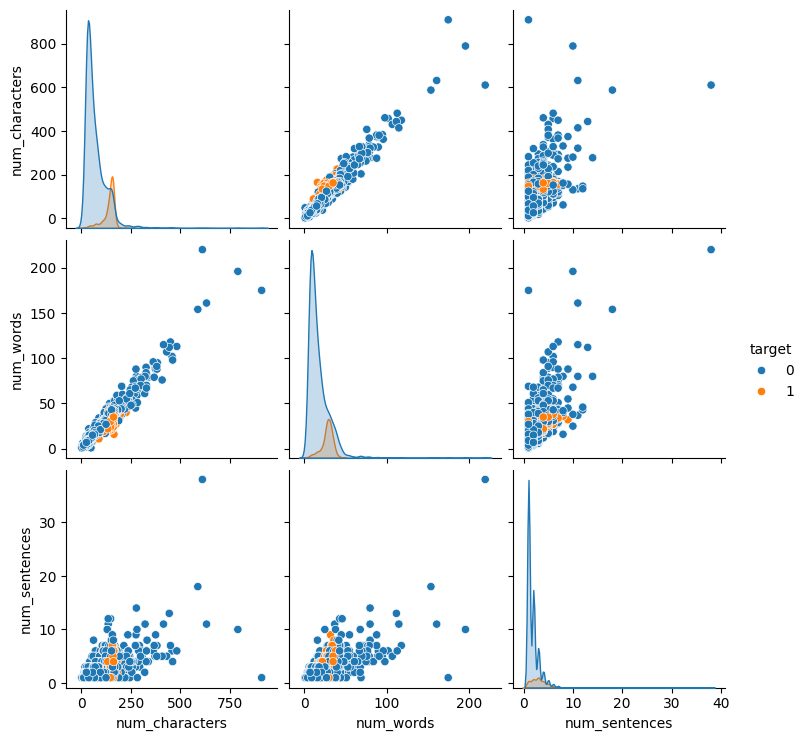

In [115]:
#characters , words and sentances relation to each other 
sns.pairplot(df , hue='target')

<Axes: >

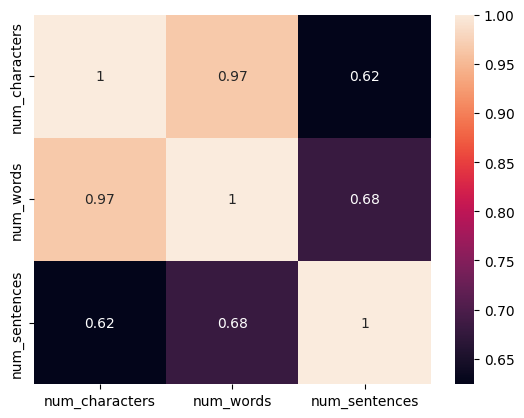

In [116]:
#correlation cofficient
numeric_df = df.select_dtypes(include=['float64','int64'])
sns.heatmap(numeric_df.corr() , annot=True)

## 3. DATA PREPROCESSING
* Lower case
* Tokenization
* Removing special characters
* Removing sstop words and punctuation
* Stemming

In [117]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [118]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
import string

In [121]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [120]:
transform_text('I loved the YT Lectures on Machine Learning. How about You')

'love yt lectur machin learn'

In [122]:
df['transformed_text']=df['text'].apply(transform_text)

In [123]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,163,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5165,0,Will Ã_ b going to esplanade fr home?,38,9,1,b go esplanad fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


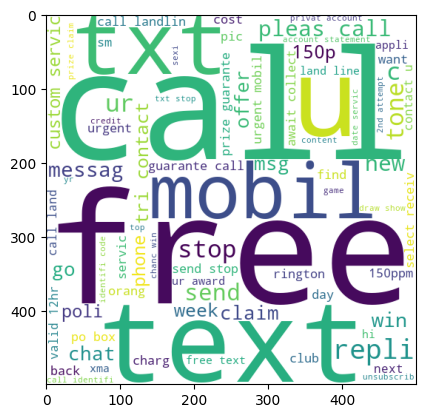

In [124]:
#making word cloud of most used words
#spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)


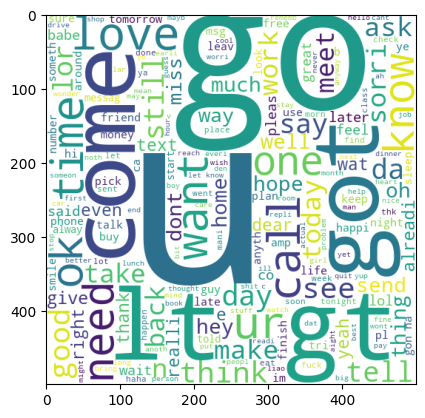

In [125]:
#ham messages
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [126]:
#top 30 words in spam
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [127]:
len(spam_corpus)

9936

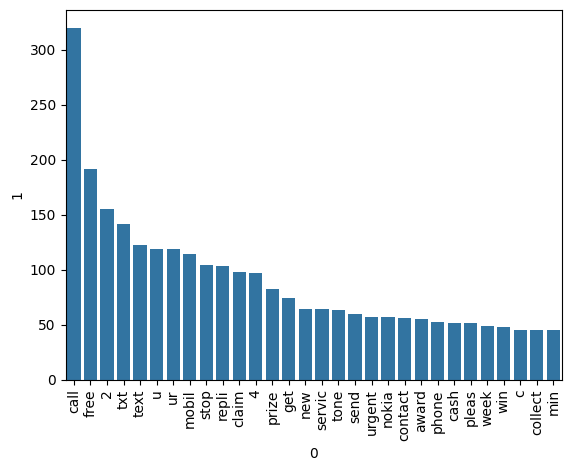

In [128]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=0, y=1, data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [129]:
#top 30 words in ham
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [130]:
len(ham_corpus)

35305

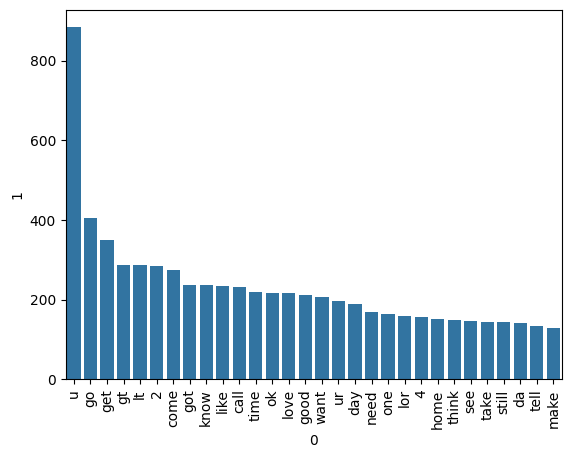

In [131]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=0, y=1, data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING


In [132]:
#textual data pr nive bayes algorithm ka best performance ata hai 
#so we will use naive bayes algorithm

In [133]:
#vectorization
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [134]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [135]:
X.shape


(5169, 6674)

In [136]:
Y = df['target'].values

In [137]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [138]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#what is random state?
##random state is used to make the split same for all the runs
#how , what does the value 2 signify?
##it is the seed value for the random number generator , so the split will be same for all the runs if the seed value is same

In [139]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB  , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
#gauusian naive bayes
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [142]:
#multinomial naive bayes
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [143]:
#bernoulli naive bayes
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [144]:
#as we can see , multinomial naive bayes is the best for this dataset
#it has precision of 1.0 and accuracy of 0.95 with tfidf vectorization
#and precision matter more than accuracy in spam detection (inbalanced dataset)

## 4.1 Evaluating Other Models

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [146]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [147]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [149]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [150]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9758220502901354
Precision -  0.991304347826087
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8636363636363636
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334


In [151]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.975822,0.991304
8,ETC,0.974855,0.974576
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.958333
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.959381,0.863636
6,AdaBoost,0.924565,0.840909


In [152]:
#predict spam or ham
def predict_spam(sample_text):
    sample_text = transform_text(sample_text)
    sample_text = tfidf.transform([sample_text]).toarray()
    if(mnb.predict(sample_text)[0]==1):
        return 'Spam'
    else:
        return 'Ham'
    

In [156]:
predict_spam('"Hi Vishal, your package is out for delivery! Track it here: [tracking-link.com]. If you weren’t expecting a package, please contact our support: [support-link.com]."')

'Ham'